## Final Project Submission

Please fill out:
* Student name: Carlos Marin
* Student pace: self paced 
* Scheduled project review date/time: 02 NOV 2022
* Instructor name: Abhineet
* Blog post URL: https://www.blogger.com/blog/post/edit/4076241086869822975/8676498022716336387?hl=en

# Whats eating Apple's customers? 
The most common phone and tablet in America and the world are the iPhones and iPads. Americans and people of the world love to tweet about products all the time on Twittter. Conducting Sentiment Analysis using Natural Language Processing (NLP). The Purpose of this project is to simulate the new iphone / android that Apple and Google have release and see what are the most common and frequent words used, and create machine learning models and Recurrent Neural Network (RNN) to evaluate model performance.

In [1]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from wordcloud import WordCloud
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
import nltk
from sklearn.linear_model import LogisticRegression

### Data Prep
The dataset comes from CrowdFlower via data.world. Human raters rated the sentiment in over 9,000 Tweets as positive, negative, or neither.

In [2]:
#Loading dataset
df = pd.read_csv('tweet_product_company.csv')

In [3]:
#Printing head of the dataframe
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Understanding Data
First we look at the dataframe information, look at the Datatype (Dtype) we are going to be working with.
Since column names are a bit long, they are renamed. Next we look for missing data, and fill in that missing data. 

In [4]:
#Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
#rename columns
df2 = df.rename(columns = {'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment',
                           'tweet_text':'Twitter_Post', 'emotion_in_tweet_is_directed_at':'Focus'})

In [6]:
#Count of misssing data
df2.isnull().sum()

Twitter_Post       1
Focus           5802
Sentiment          0
dtype: int64

In [7]:
#FILL Missing values
df2['Focus'] = df2['Focus'].fillna("")
df2['Twitter_Post'] = df2['Twitter_Post'].fillna("")

In [8]:
#verification of missing null values is removed
df2.isnull().sum()

Twitter_Post    0
Focus           0
Sentiment       0
dtype: int64

In [9]:
df2.head()

,Twitter_Post,Focus,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Univariate Distribution of the Sentiments & Focus group
Data visualization of the different sentiments and Focus group in the dataframe.

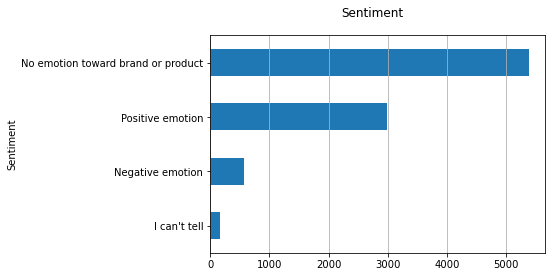

In [10]:
#Distribution of the different Sentiments
fig, ax = plt.subplots()
fig.suptitle("Sentiment", fontsize=12)
df2["Sentiment"].reset_index().groupby("Sentiment").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

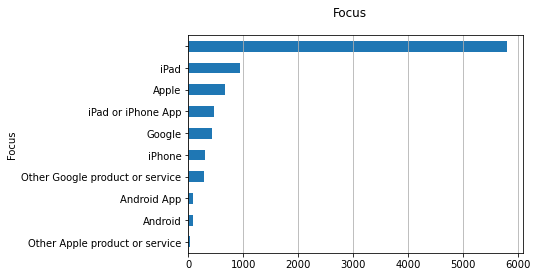

In [11]:
#Distribution of focus the group.
fig, ax = plt.subplots()
fig.suptitle("Focus", fontsize=12)
df2["Focus"].reset_index().groupby("Focus").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

### Preprocessing data - Pre-NLP techniques

First, we remove quotation marks, special characters, and any numbers that are in the tweets.
Next we remove any words that are less than 3 letters long.

In [12]:
#Removing quotation marks, special characters, and numbers
df2['Clean_Twitter_Post01'] = df2['Twitter_Post'].str.replace("[^a-zA-Z]", " ")

In [13]:
# remove short words, less than 3 letters long
df2['Clean_Twitter_Post02'] = df2['Clean_Twitter_Post01'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))


In [14]:
df2[['Twitter_Post','Clean_Twitter_Post02']].head(15)

,Twitter_Post,Clean_Twitter_Post02
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley have iPhone After tweeting RISE Austin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know about fludapp Awesome iPad iPhon...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin wait iPad also They should sale the...
3,@sxsw I hope this year's festival isn't as cra...,sxsw hope this year festival crashy this year ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff SXSW Marissa Mayer Googl...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,teachntech iPad Apps SpeechTherapy Communicati...
6,,
7,"#SXSW is just starting, #CTIA is around the co...",SXSW just starting CTIA around corner googleio...
8,Beautifully smart and simple idea RT @madebyma...,Beautifully smart simple idea madebymany thene...
9,Counting down the days to #sxsw plus strong Ca...,Counting down days sxsw plus strong Canadian d...


### Removing Stop Words in NLP
The words which are generally filtered out before processing a natural language are called **stop words**. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”, etc..



First we identify, the language in which we want the stop words removed. The lambda function is used for condition checking, in which case the words are not in the stopwords list. The lambda function is apllied to the ****"Clean_Twitter_Post02"**** column, and the new column is named ****"Clean_Twitter_Post2"****. 

In [15]:
#Applying Stop words removal
from nltk.corpus import stopwords
import string


stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

#Application of stopwords list to dataframe for removal
df2['Clean_Twitter_Post2'] = df2['Clean_Twitter_Post02'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))

In [16]:
df2[['Clean_Twitter_Post2','Clean_Twitter_Post02']].head(15)

,Clean_Twitter_Post2,Clean_Twitter_Post02
0,wesley iPhone After tweeting RISE Austin dead ...,wesley have iPhone After tweeting RISE Austin ...
1,jessedee Know fludapp Awesome iPad iPhone like...,jessedee Know about fludapp Awesome iPad iPhon...
2,swonderlin wait iPad also They sale SXSW,swonderlin wait iPad also They should sale the...
3,sxsw hope year festival crashy year iPhone sxsw,sxsw hope this year festival crashy this year ...
4,sxtxstate great stuff SXSW Marissa Mayer Googl...,sxtxstate great stuff SXSW Marissa Mayer Googl...
5,teachntech iPad Apps SpeechTherapy Communicati...,teachntech iPad Apps SpeechTherapy Communicati...
6,,
7,SXSW starting CTIA around corner googleio skip...,SXSW just starting CTIA around corner googleio...
8,Beautifully smart simple idea madebymany thene...,Beautifully smart simple idea madebymany thene...
9,Counting days sxsw plus strong Canadian dollar...,Counting down days sxsw plus strong Canadian d...


In [17]:
#Removing unnecessary columns.
drop = ['Twitter_Post', 'Clean_Twitter_Post01', 'Clean_Twitter_Post02' ]
df3 = df2.drop(drop, axis = 1)

In [18]:
df3.head(5)

,Focus,Sentiment,Clean_Twitter_Post2
0,iPhone,Negative emotion,wesley iPhone After tweeting RISE Austin dead ...
1,iPad or iPhone App,Positive emotion,jessedee Know fludapp Awesome iPad iPhone like...
2,iPad,Positive emotion,swonderlin wait iPad also They sale SXSW
3,iPad or iPhone App,Negative emotion,sxsw hope year festival crashy year iPhone sxsw
4,Google,Positive emotion,sxtxstate great stuff SXSW Marissa Mayer Googl...


### Stemming & Lemmatization

**Stemming** is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

**Lemmatization** is a linguistic term that means grouping together words with the same root or lemma but with different inflections or derivatives of meaning so they can be analyzed as one item. In general, lemmatization converts words into their base forms. In linguistics, lemmatization helps a reader consider a word’s intended meaning instead of its literal meaning. Because of that, lemmatization is often confused with stemming.

First,we initiate the **Snowball Stemmer** which  is a stemming algorithm.  the stemmer requires a language parameter, so we set it to english. Then we create function with the stemmer which is then going to be applied to the **Clean_Twitter_Post2** column, this is used to create the new column which contains the stemmed words only, which is named **Stem_Post**.

For Lemmatization.. First we call WordNetLemmatizer, and assign it a variable. With that variable, the lemmatization function is created. The Lemmatization function is applied to the **Stem_Post** column. With this applicatin we create a new column called **lem_post**. 

In [19]:
#Applying Stemming

#Assigning Variable
stemmer = nltk.SnowballStemmer("english")

#creating stem function
def stem (text):
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [20]:
#Application of Stem function
df3['Stem_Post'] = df3['Clean_Twitter_Post2'].apply(stem)

In [21]:
#Applying Lemmatization

#Assigining variable 
lemmatizer = WordNetLemmatizer()

#creating lemmatization function
def lemmatization(text):
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [22]:
#Application of lemmatization function
df3['lem_post'] = df3['Stem_Post'].apply(lemmatization)

### Lowercase conversion
Converting data to lowercase helps in the process of preprocessing and in later stages in the NLP application, essentially it is needed as "removing noise" for when we are doing NLP Processing. 

The lowercase function is created, applied to the **lem_post** data column and thus creating the final column **Final_Post**. 

In [23]:
#Applying lower case - Post Lemmatization

#creating lowercase function
def lowercase (text):
    text = [word.lower() for word in text.split(' ')]
    text = " ".join(text)
    return text

#Application of lowercase function
df3['Final_Post'] = df3['lem_post'].apply(lowercase)

In [24]:
df3[['Clean_Twitter_Post2','Final_Post']].head(15)

,Clean_Twitter_Post2,Final_Post
0,wesley iPhone After tweeting RISE Austin dead ...,wesley iphon after tweet rise austin dead need...
1,jessedee Know fludapp Awesome iPad iPhone like...,jessede know fludapp awesom ipad iphon like ap...
2,swonderlin wait iPad also They sale SXSW,swonderlin wait ipad also they sale sxsw
3,sxsw hope year festival crashy year iPhone sxsw,sxsw hope year festiv crashi year iphon sxsw
4,sxtxstate great stuff SXSW Marissa Mayer Googl...,sxtxstate great stuff sxsw marissa mayer googl...
5,teachntech iPad Apps SpeechTherapy Communicati...,teachntech ipad app speechtherapi communic sho...
6,,
7,SXSW starting CTIA around corner googleio skip...,sxsw start ctia around corner googleio skip ju...
8,Beautifully smart simple idea madebymany thene...,beauti smart simpl idea madebymani thenextweb ...
9,Counting days sxsw plus strong Canadian dollar...,count day sxsw plus strong canadian dollar mea...


### Generating WordClouds - Preparation
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. This technique is very common when analzing data from social media.

For visualization of only Apple related content first we select the Apple associated rows from the Focus column. The Apple associated words are in "name" from there we filter using the ".isin" function to select the Apple associated rows. This dataframe which contains only Apple products, will be called "**data**".

From the column **data**, we then split it by the three different sentiments, "Positive emotion", "Negative emotion", "No emotion toward brand or product". This is done using ".loc" which is a label based function. The "No emotion toward brand or product" Apple Sentiment is dataframe is called **dfNaN**. The Positive emotion Sentiment Dataframe is called **df_pve**. The Negative emotion sentiment dataframe is called **df_nve**.

From those different Sentiment Dataframes, **Final_Post** is selected. For No emotion **nan** is the dataframe. For positive emotion **pve** is the dataframe. For Negative emotion **nve** is the dataframe. Next we select "Final_Post", but before we can visualize the words. we need to convert the list into one long string using Python's map function.

In [25]:
#Filtering for Apple Products
name = ['iPad','iPhone', 'Apple', 'iPad or iPhone App']
data = df3[df3.Focus.isin(name)]

#generating different dataframes's by sentiment for wordcloud
dfNaN = data.loc[data.Sentiment== 'No emotion toward brand or product']
df_pve= data.loc[data.Sentiment== 'Positive emotion']
df_nve = data.loc[data.Sentiment== 'Negative emotion']


In [26]:
#Selecting "Final_Post" Column for each of the different Sentiments - For Apple products
#No Emotion toward brand or Product
nan = dfNaN['Final_Post']
#Positive Emotion
pve = df_pve['Final_Post']
#Negative Emotion
nve = df_nve['Final_Post']

#All Apple words, with all sentiments
all_words = data['Final_Post']

#Converting list to string using map
#No Emotion
nanl = ' '.join(map(str, nan))
#Positive Emotion
pvel = ' '.join(map(str, pve))
#Negative Emotion
nvel = ' '.join(map(str, nve))
#All Apple Words
allw = ' '.join(map(str, all_words))

In [27]:
#Filtering for Google / Android Products

g_name = ['Google', 'Android', 'Android app']
g_data = df3[df3.Focus.isin(g_name)]

#generating different dataframes's by sentiment for wordcloud
gNaN = g_data.loc[g_data.Sentiment== 'No emotion toward brand or product']
g_pve= g_data.loc[g_data.Sentiment== 'Positive emotion']
g_nve = g_data.loc[g_data.Sentiment== 'Negative emotion']

In [28]:
#Selecting "Final_Post" Column for each of the different Sentiments - For Google/Android products
#No Emotion toward brand or Product
g_nan = gNaN['Final_Post']
#Positive Emotion
g_pve = g_pve['Final_Post']
#Negative Emotion
g_nve = g_nve['Final_Post']

#All Apple words, with all sentiments
g_words = g_data['Final_Post']

#Converting list to string using map
#No Emotion
g_nanl = ' '.join(map(str, g_nan))
#Positive Emotion
g_pvel = ' '.join(map(str, g_pve))
#Negative Emotion
g_nvel = ' '.join(map(str, g_nve))
#All Apple Words
g_allw = ' '.join(map(str, g_words))

### Wordcloud for 'No emotion toward brand or product' sentiment

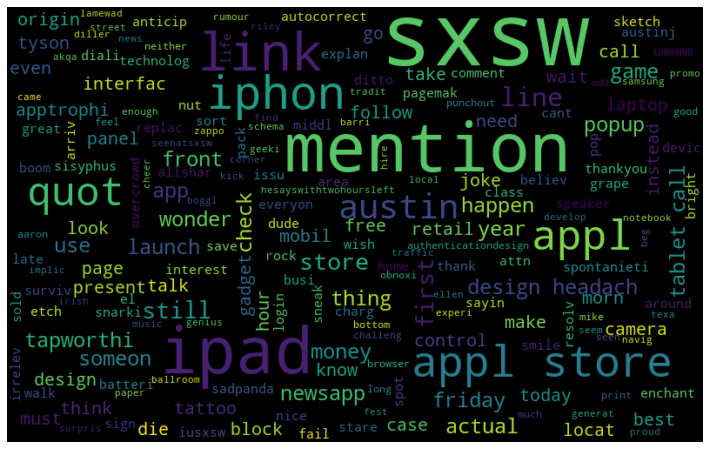

In [29]:
#wordcloud for neutral words - APPLE 
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(nanl)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

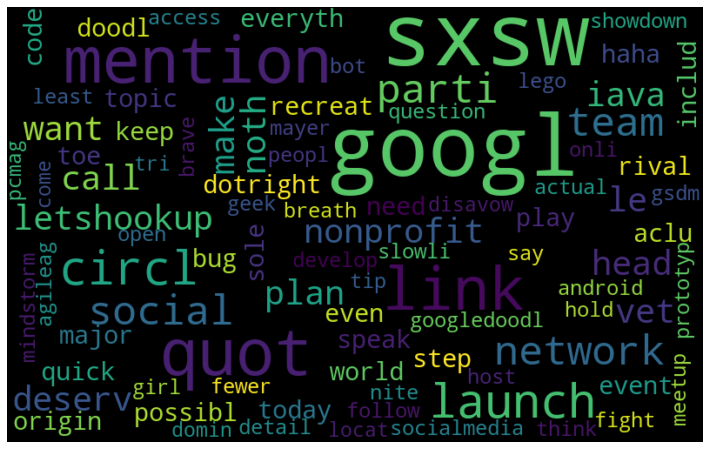

In [30]:
#wordcloud for neutral words - GOOGLE / ANDROID 
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(g_nanl)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Wordcloud for the 'Positive Emotion' Sentiment

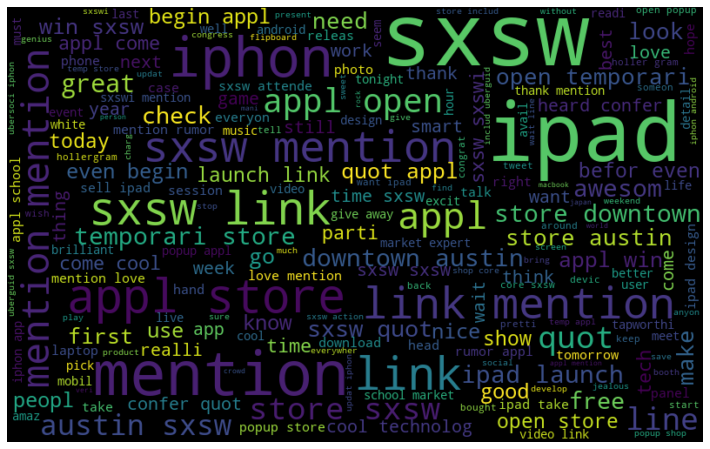

In [31]:
#wordcloud for Positive words - APPLE PRODUCTS
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(pvel)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

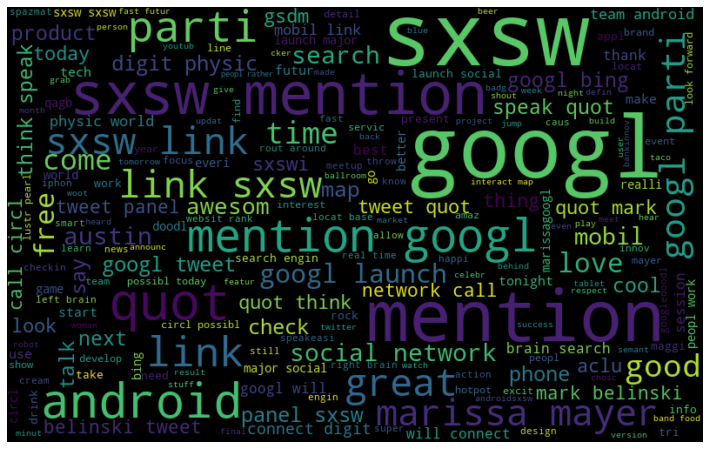

In [32]:
#wordcloud for Positive words - GOOGLE / ANDROID
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(g_pvel)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Wordcloud for the 'Negative Emotion' Sentiment

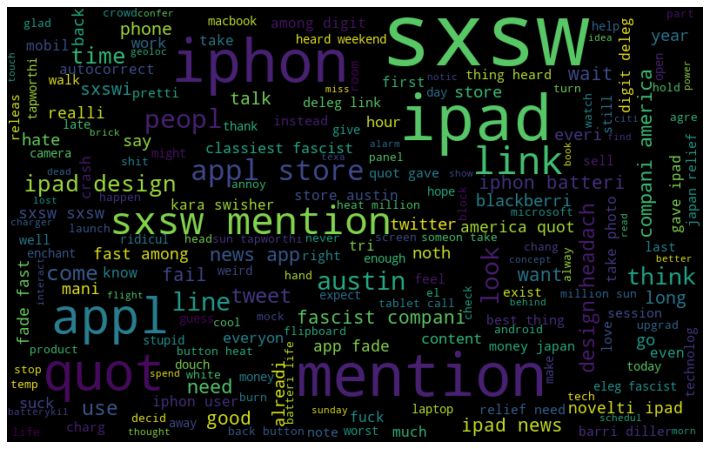

In [33]:
#wordcloud for Negative words - APPLE PRODUCTS
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(nvel)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

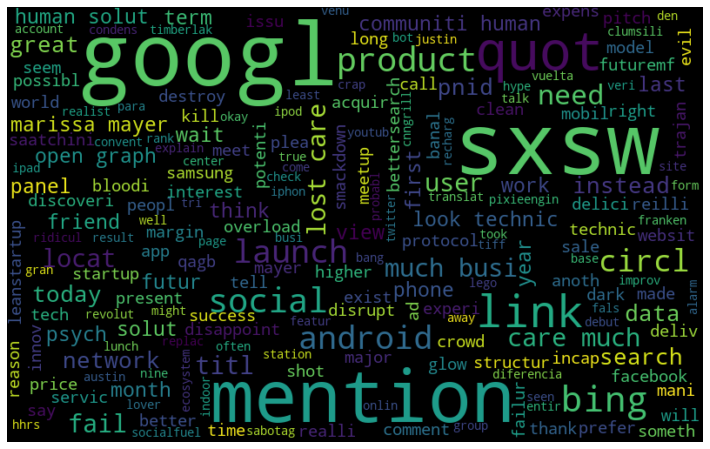

In [34]:
#wordcloud for Negative words - GOOGLE / ANDROID
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(g_nvel)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Wordcloud for All Sentiments for Apple  & Google Products

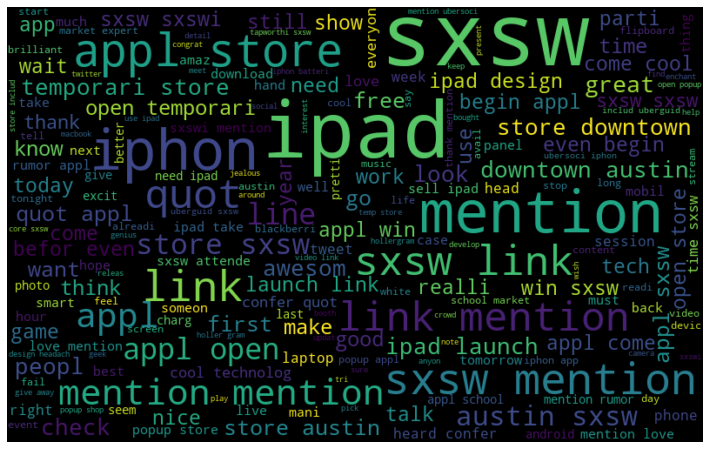

In [35]:
#wordcloud for all sentiments - APPLE 
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allw)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

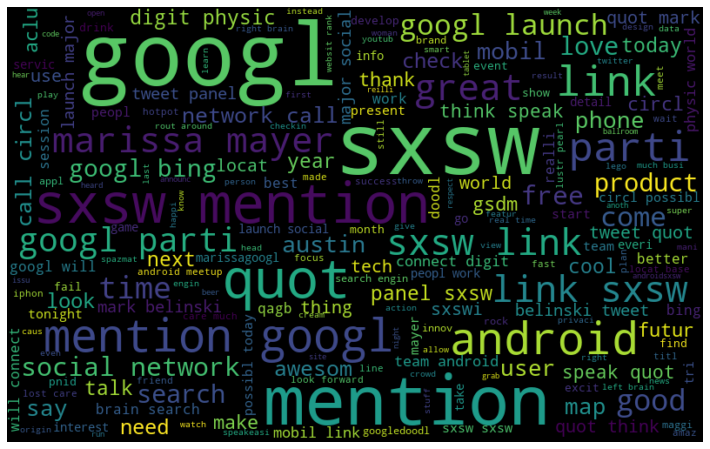

In [36]:
#wordcloud for all sentiments - GOOGLE / ANDROID
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(g_allw)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Model Training - COUNT VECTORIZER

**CountVectorizer** is a tool provided by Python's scikit-learn library.It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. 


First we identify our target variable 'Y', which will be Sentiment, the 'X' is the response variable which will be the 'Final_Post'. 

The Countvectorizer is called and assigned a variable, it is called 'cv' here.

The response variable is fitted on the CountVectorizer, and assign it a new variable. With this new variable, we call the train test split.


#### Train Test Split
Train Test Split here splits the data into test sets and train sets. We set the test size to 0.15, or 15% of the data.

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

#### Logistic Regression
Logisitic Regression is used a machine learning algorithm that is being used as text classification

#### Classification Report
To Understand model performance, we will run the reponse variable test data set and predictions data set into the classification report.

In [37]:
#Importing CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

#Instantiating the vectorizer and assigning Count Vectorizer a variable
cv = CountVectorizer(max_features=1000, stop_words='english')

#Assigning target and response variables
y = df3['Sentiment']
X = df3['Final_Post']

#Fitting the data into vectorizer
CVX = cv.fit_transform(X)

#Performing train test split, and splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(CVX, y, random_state=42, test_size=0.15)

In [38]:
#Importing Train Test Split
from sklearn.model_selection import train_test_split

#Instantiating the Logistic Regression Model
model = LogisticRegression()

#Fitting the training data into the model
model.fit(x_train, y_train)

#Creating predictions from response test data
cv_predictions = model.predict(x_test)

#Printing classification report from target test data and the predictions
print (classification_report(y_test, cv_predictions))

# Calculating accuracy from test data and predictions on test data
print("Accuracy Score: ", accuracy_score(y_test,cv_predictions))

                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        28
                  Negative emotion       0.42      0.22      0.29        81
No emotion toward brand or product       0.69      0.82      0.75       803
                  Positive emotion       0.58      0.47      0.52       452

                          accuracy                           0.65      1364
                         macro avg       0.42      0.38      0.39      1364
                      weighted avg       0.62      0.65      0.63      1364

Accuracy Score:  0.6510263929618768


#### Classification report

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

4. Accuracy: One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.



#### Interpretation of classification report
**Precision:** 

Out of all of the sentiments that the model predicted, for **negative emotion** it was only correct 42% of the time.
    
Out of all of the sentiments that the model predicted, for **no emotion toward brand or product** it was only correct 69% of the time.
    
Out of all of the sentiments that the model predicted, for **positive emotion** it was only correct 58% of the time.

**Recall:** 

The model only predicted the **negative emotion** outcome correctly for 22% of those tweets.

The model only predicted the **no emotion** outcome correctly for 82% of those tweets.

The model only predicted the **positive emotion** outcome correctly for 47% of those tweets.

**f1 score:**

The **Negative emotion** f1 score is 0.29, a poor job. 

The **No emotion** f1 score is 0.75, a good job.

The **Positive emotion** f1 score is 0.52, a poor job.

### Model training TFIDF VECTORIZER
**TF-IDF** stands for **term frequency-inverse document frequency** and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus). TFIDF is also a tool provided by scikit-learn.

First we identify our target variable 'Y', which will be Sentiment, the 'X' is the response variable which will be the 'Final_Post'. 

The TFIDF is called and assigned a variable, it is called 'tfdf' here.

The response variable is fitted on the TFIDF, and assign it a new variable. With this new variable, we call the train test split.

Just like with CountVectorizer, we will use **Logistic Regression** as classification tool to make predictions and create a **classification report** to understand the model performance

In [39]:
#Importing TFIDF Vectorizor for use
from sklearn.feature_extraction.text import TfidfVectorizer

#Instantiating the vectorizer and assigning a variable.
tfdf = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

#Assigning the Target and Response variables
y = df3['Sentiment']
X = df3['Final_Post']

#Fitting the data into vectorizer
TFX = tfdf.fit_transform(X)

#Performing train test split, and splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(TFX, y, random_state=42, test_size=0.05)

In [40]:
#Instantiating the Logistic Regression Model
model = LogisticRegression()

#Fitting the training data into the model
model.fit(x_train, y_train)

#Creating predictions from response test data
tfidf_predictions = model.predict(x_test)

#Printing classification report from target test data and the predictions
print (classification_report(y_test, tfidf_predictions))

# Calculating accuracy from test data and predictions on test data
print("Accuracy Score", accuracy_score(y_test,tfidf_predictions))

                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        11
                  Negative emotion       0.71      0.24      0.36        21
No emotion toward brand or product       0.71      0.92      0.80       273
                  Positive emotion       0.72      0.46      0.56       150

                          accuracy                           0.71       455
                         macro avg       0.54      0.40      0.43       455
                      weighted avg       0.70      0.71      0.68       455

Accuracy Score 0.7120879120879121


#### Interpretation of Classification report

**Precision:** 

Out of all of the sentiments that the model predicted, for **negative emotion** it was only correct 71% of the time.
    
Out of all of the sentiments that the model predicted, for **no emotion toward brand or product** it was only correct 71% of the time.
    
Out of all of the sentiments that the model predicted, for **positive emotion** it was only correct 72% of the time.

**Recall:** 

The model only predicted the **negative emotion** outcome correctly for 24% of those tweets.

The model only predicted the **no emotion** outcome correctly for 92% of those tweets.

The model only predicted the **positive emotion** outcome correctly for 46% of those tweets.

**f1 score:**

The **Negative emotion** f1 score is 0.36, a poor job. 

The **No emotion** f1 score is 0.80, a good job.

The **Positive emotion** f1 score is 0.56, a poor job.




## Summary of Results / Conclusion
The TFIDF Vectorizer easily outperforms the Count Vectorizer, when involved in proper sentiment classification using texts, in all aspects from precision, to recalll, f1 score, and accuracy.





## Next steps...
1) Perform Sentiment analysis at 6 months then a year to see how much better or worse the product has improved.

2) Based on the reivews, make improvements to product to please customer.

3) Perform on other companies that make smart phones such as Nokia, Samsung, Huawei see how they are doing using sentiment analysis.


### APPENDIX I : RECURRENT NEURAL NETWORKS (RNN)

**Recurrent Neural Networks** or **RNN** as they are called in short, are a very important variant of neural networks heavily used in Natural Language Processing.

RNN is widely used neural network architecture for NLP. It has proven to be comparatively accurate and efficient for building language models and in tasks of speech recognition.


First we again perform train test split, to split the data into training data and testing data. 

***Please note:  this is not to be included in the final presentation, as this did not work as intended. Rather to show its steps taken to build the RNN model***

In [42]:
#Performing train test split
train_data, test_data = train_test_split(df3, test_size=0.20, random_state=7)

#### Tokenization using Keras
Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning.

A few keywords here:

**tokenizer** create tokens for every word in the data corpus and map them to a index using dictionary.

**word_index** assigns a unique index to each word present in the text. This unique integer helps the model during training purposes.

**vocab_size** represents the total number of word in the data corpus

In This portion we call the tokenizer, and fit it on the train set of the Final_Post. Next I assign the word index. Then based on the word index, we use that to get the length and this will be the vocabulary size.

In [43]:
#Importing Tokenizer from Keras Library
from keras.preprocessing.text import Tokenizer

#Assigning the Tokenizer a variable
tokenizer = Tokenizer()

#Fitting the Tokenizer to the training data portion of the Final_Post
tokenizer.fit_on_texts(train_data.Final_Post)


#Assigning the word_index
word_index = tokenizer.word_index

#Gathering vocab size based on word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 5853


### Setting up X_train and X_test, by converting to integers

**pad_sequences** is used to ensure that all sequences in a list have the same length. 

**texts_to_sequences** method helps in converting tokens of text corpus into a sequence of integers.
 
**Maxlen** is maxiumum length of sequences.

First we import our packages. Next set up our X_train and X_test variables. This is done by. calling **pad_sequences** then inside a parenthesis, we call tokenizer with texts to sequences, then inside another parrenthesis the train data/test data final_post column.

In [44]:
#Importing pad_sequnces and texts_to_sequences from keras
from keras.preprocessing import sequence
from keras.utils import pad_sequences

#Identifying maxlen for X-train and X-test
MAX_WORDS = 30

#Converting text to integers
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Final_Post), maxlen = MAX_WORDS)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Final_Post), maxlen = MAX_WORDS)


#printing shape
print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (7274, 30)
Testing X Shape: (1819, 30)


### Label Encoding Y_train and Y_test

**Label Encoding** refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

Here we are converting the different Sentiments into a an encoded form (0,1,2, etc.). 

In [45]:
#Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

#Assigning LabelEncoder a variable
encoder = LabelEncoder()

#Fitting the training data into the Encoder
encoder.fit(train_data.Sentiment)

#Transforming train data and test data using encoder
y_train = encoder.transform(train_data.Sentiment)
y_test = encoder.transform(test_data.Sentiment)


#Reshaping data
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

#Printing Shape
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (7274, 1)
y_test shape: (1819, 1)


### Building our Keras Model

We are clear now to start building our Keras Model.

I will be using the **Sequential model**, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).


For model architecture, I use:

1) Embedding Layer - Generates Embedding Vector for each input sequence.

2) LSTM - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

3) Dense - Fully Connected Layers for classification

4) Dropout - Prevents Overfitting

In [46]:
#Importing important packages
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense,Dropout
from keras.callbacks import EarlyStopping

#Building our model
model = Sequential()
model.add(Embedding(50000, 128))
model.add(Dense(32, input_shape=(16,), activation=None))
model.add(Dropout(0.7))
model.add(Dense(16, input_shape=(8,), activation=None))
model.add(Dropout(0.7))
model.add(LSTM(250, dropout=0.7, recurrent_dropout = 0.5))
model.add(Dropout(0.7))
model.add(Dense(4, activation='softmax'))
print(model.summary())

2022-11-10 11:45:10.339251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         6400000   
                                                                 
 dense (Dense)               (None, None, 32)          4128      
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 dense_1 (Dense)             (None, None, 16)          528       
                                                                 
 dropout_1 (Dropout)         (None, None, 16)          0         
                                                                 
 lstm (LSTM)                 (None, 250)               267000    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0

### Compiling and running our model

By compiling our model, we are configuring our model for training

1) The loss is **sparse categorical crossentropy** - Computes the crossentropy loss between the labels and predictions

2) Optimizer is **Adam** - Optimizer which implements the Adam Algorithm

3) metrics: List of metrics to be evaluated by the model during training and testing. We have set it to **accuracy**.

### Fitting & Running the model
As we do with machine learning:

1) First we fit the the trainig data

2) for Validation_data we set our test data

3) validation_split: Between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction 

In [47]:
#compiling our model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
#fitting the model
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), validation_split = 0.4)

Epoch 1/10
228/228 [==============================] - 44s 182ms/step - loss: 0.9568 - accuracy: 0.5834 - val_loss: 0.9329 - val_accuracy: 0.5855
Epoch 2/10
228/228 [==============================] - 54s 236ms/step - loss: 0.9067 - accuracy: 0.5965 - val_loss: 0.8792 - val_accuracy: 0.6168
Epoch 3/10
228/228 [==============================] - 58s 256ms/step - loss: 0.8457 - accuracy: 0.6386 - val_loss: 0.8541 - val_accuracy: 0.6295
Epoch 4/10
228/228 [==============================] - 57s 251ms/step - loss: 0.7982 - accuracy: 0.6852 - val_loss: 0.8757 - val_accuracy: 0.6372
Epoch 5/10
228/228 [==============================] - 57s 250ms/step - loss: 0.7472 - accuracy: 0.7142 - val_loss: 0.9023 - val_accuracy: 0.6465
Epoch 6/10
228/228 [==============================] - 56s 246ms/step - loss: 0.7256 - accuracy: 0.7255 - val_loss: 0.9093 - val_accuracy: 0.6465
Epoch 7/10
228/228 [==============================] - 55s 243ms/step - loss: 0.7060 - accuracy: 0.7343 - val_loss: 0.9347 - val_ac

### Training data model evaluation

In [49]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.5545766353607178
Train accuracy: 0.8078086376190186


### Test data model evaluation

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9356714487075806
Test accuracy: 0.6223199367523193


### Visualization of accuracy & loss per epoch.

<bound method Axes.plot of <AxesSubplot:title={'center':'model accuracy'}, xlabel='epoch', ylabel='accuracy'>>

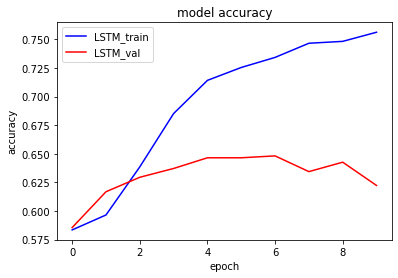

In [51]:
s, (at) = plt.subplots(1,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'])
at.plot


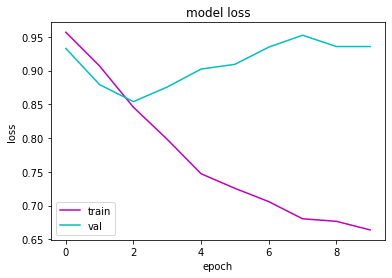

In [52]:
s, (al) = plt.subplots(1,1)
al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'])

### Interpretation of our model

Despite having multiple Dropout models. Roughly we delay the overfitting process so it starts at 4 epochs. As loss increases to from 1.00, overfitting occurs.

The training data high accuracy and less loss, which is expected.

The test data has a higher loss and lower accuracy.

Multiple steps must be taken to continue preventing overfitting.

### In closing

The Natural Language Data pre-processing allowed to see what were the most common words when it came to different sentiments.

Comparison of Count Vectorizer and TFIDF with logistic regression, with TFIDF having the best model performance.

RNN deep learning model, had training accuracy of 80% while the testing data had 62%. 